In [1]:
#Download data from https://www.kaggle.com/kyanyoga/sample-sales-data/data
import pandas as pd

In [2]:
#1. Load into dataframe
df = pd.read_csv("sales_data_sample.csv", encoding = "ISO-8859-1")

In [3]:
#2. show columns 
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [4]:
#3. show first rows 
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
#4. see NAs values
print(df.shape)
df.isnull().sum()

(2823, 25)


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [6]:
#5. resolve NAs values
#ADDRESSLINE2 - means that does not have another address - not useful for analysis - drop column
#state - if it is NA means that is not in USA, - fill with empty string 
#POSTALCODE - delete rows that does not have postal code
#TERRITORY - not clear meaning, drop column 
df.drop(["ADDRESSLINE2","TERRITORY"],axis=1,inplace=True)
df["STATE"].fillna("", inplace = True) 
df.dropna(inplace=True)
df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [7]:
#6. get the different countries
df["COUNTRY"].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [8]:
#7. drop not important information 
df.drop(["ORDERNUMBER","ORDERLINENUMBER","ORDERDATE", "STATUS", "QTR_ID", "MSRP", "PRODUCTCODE", "CUSTOMERNAME", "PHONE", "ADDRESSLINE1", "CITY", "POSTALCODE", "CONTACTLASTNAME", "CONTACTFIRSTNAME"], axis=1,inplace=True)

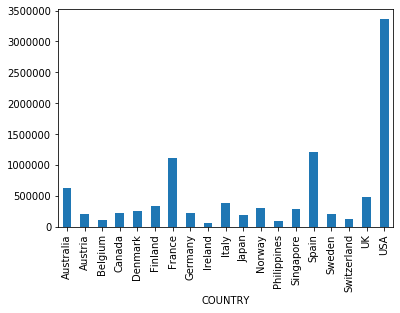

In [9]:
#8. group by country and show sales
df.groupby(['COUNTRY'])['SALES'].sum().plot(kind='bar')

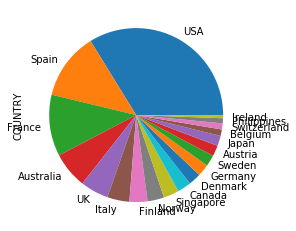

In [10]:
#9. show pie chart to see how many rows are from USA: there are a lot, which makes sense that the sales are more 
df.COUNTRY.value_counts().plot(kind='pie')

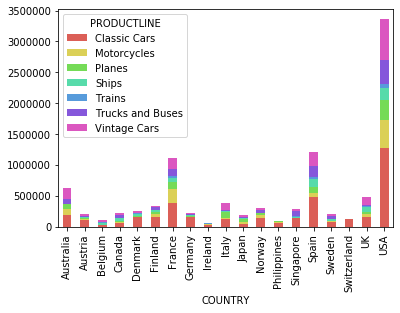

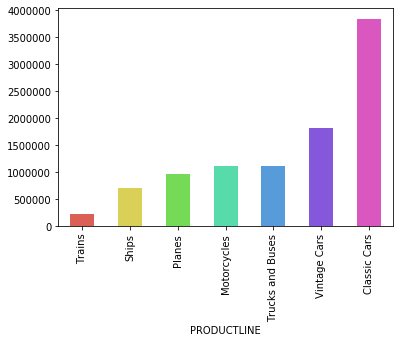

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sorted_values = df.groupby(['PRODUCTLINE']).sum().unstack()['SALES'].sort_values()
palette = sns.color_palette("hls", len(sorted_values))
df.groupby(['COUNTRY','PRODUCTLINE']).sum().unstack()['SALES'].plot(kind='bar', stacked=True, color=palette)
plt.show()
sorted_values.plot(kind='bar', color=palette)
plt.show()

In [12]:
#transform PRODUCTLINE column to numerical variable following the order 
s = sorted_values.reset_index()['PRODUCTLINE'].astype(str)
df['PRODUCTLINE'] = pd.Categorical(df["PRODUCTLINE"], ordered=True, categories=list(s.values))
print(df['PRODUCTLINE'].cat.categories)
df['PRODUCTLINE'] = df['PRODUCTLINE'].cat.codes


Index(['Trains', 'Ships', 'Planes', 'Motorcycles', 'Trucks and Buses',
       'Vintage Cars', 'Classic Cars'],
      dtype='object')


In [13]:
#10. transform categorical to ordered values
df["DEALSIZE"] = pd.Categorical(df["DEALSIZE"], ordered=True, categories=['Small','Medium','Large'])
df["DEALSIZE"] = df["DEALSIZE"].cat.codes

In [14]:
#10. transform variables to categorical variables that are not ordered
df["COUNTRY"] = pd.Categorical(df["COUNTRY"])
df["STATE"] = pd.Categorical(df["STATE"])

In [15]:
#11. remove QUANTITYORDERED column: it can be calculated by SALES/PRICEEACH 
df.drop("QUANTITYORDERED", axis=1,inplace=True)


In [16]:
#12. show cleaned dataframe
df.head()

,PRICEEACH,SALES,MONTH_ID,YEAR_ID,PRODUCTLINE,STATE,COUNTRY,DEALSIZE
0,95.70,2871.00,2,2003,3,NY,USA,0
1,81.35,2765.90,5,2003,3,,France,0
2,94.74,3884.34,7,2003,3,,France,1
3,83.26,3746.70,8,2003,3,CA,USA,1
5,96.66,3479.76,10,2003,3,CA,USA,1


In [17]:
#13. transform categorical to binary variables
categorical_variables = ['STATE','COUNTRY']
dummies = pd.get_dummies(df, categorical_variables) 

In [18]:
#14. normalize
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

np_scaled = min_max_scaler.fit_transform(dummies)
df_normalized = pd.DataFrame(np_scaled, columns = dummies.columns)

#remove COUNTRY_USA - can be infered by state_* columns 
df_normalized.drop('COUNTRY_USA', axis=1, inplace=True)

In [19]:
#15. save the cleaned dataframe into csv
df_normalized.to_csv('cleaned_data.csv', index=False)

In [20]:
dummies.to_csv('dummies.csv', index=False)

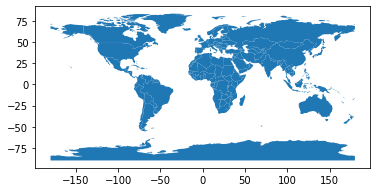

In [24]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot()

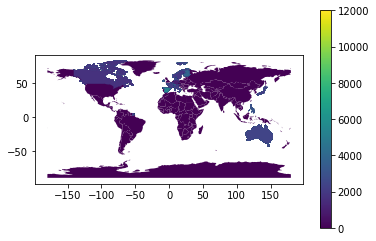

In [35]:
merged_inner = pd.merge(left=world, right=df, left_on='name',right_on='COUNTRY', how='left')
merged_inner['SALES'].fillna(-1, inplace=True)

#TODO: set bounds to color -1 values with gray
#bigger figure 
#bounds= [-1, 0, 2000, 4000,6000,8000,10000,12000]
merged_inner.plot(column='SALES', legend=True)